In [1]:
import sqlite3
import pandas as pd
import numpy as np

try:
    con = sqlite3.connect('./data/lung_cancer.db')
except Exception as err:
    print(f"Connection error:\n{err}")

# Extract data as pd.DataFrame
cur = con.cursor()
raw_df = pd.read_sql_query('SELECT * FROM lung_cancer', con)

# Close db connection
con.close()

In [2]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

C:\Users\ashre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
raw_df

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,6.202150e+17,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0
10344,1.157407e+18,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0
10345,1.488014e+18,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1
10346,3.987035e+17,69,Male,No,Not Present,High,81,75,2014,Still Smoking,No,Medium,Right,1


In [4]:
df = raw_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10348 non-null  float64
 1   Age                     10348 non-null  int64  
 2   Gender                  10348 non-null  object 
 3   COPD History            9236 non-null   object 
 4   Genetic Markers         10348 non-null  object 
 5   Air Pollution Exposure  10345 non-null  object 
 6   Last Weight             10348 non-null  int64  
 7   Current Weight          10348 non-null  int64  
 8   Start Smoking           10348 non-null  object 
 9   Stop Smoking            10348 non-null  object 
 10  Taken Bronchodilators   9287 non-null   object 
 11  Frequency of Tiredness  10348 non-null  object 
 12  Dominant Hand           10348 non-null  object 
 13  Lung Cancer Occurrence  10348 non-null  int64  
dtypes: float64(1), int64(4), object(9)
mem

In [6]:
df.isna().any()

ID                        False
Age                       False
Gender                    False
COPD History               True
Genetic Markers           False
Air Pollution Exposure     True
Last Weight               False
Current Weight            False
Start Smoking             False
Stop Smoking              False
Taken Bronchodilators      True
Frequency of Tiredness    False
Dominant Hand             False
Lung Cancer Occurrence    False
dtype: bool

In [7]:
df.isna().sum()

ID                           0
Age                          0
Gender                       0
COPD History              1112
Genetic Markers              0
Air Pollution Exposure       3
Last Weight                  0
Current Weight               0
Start Smoking                0
Stop Smoking                 0
Taken Bronchodilators     1061
Frequency of Tiredness       0
Dominant Hand                0
Lung Cancer Occurrence       0
dtype: int64

There are null values in COPD History and Taken Bronchodilators

In [8]:
#remove null values
df = df.dropna()

In [9]:
df

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,7.785505e+17,71,Male,Yes,Not Present,High,100,93,1958,2015,Yes,High,Right,0
10343,6.202150e+17,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0
10344,1.157407e+18,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0
10345,1.488014e+18,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1


In [10]:
df.describe()

,ID,Age,Last Weight,Current Weight,Lung Cancer Occurrence
count,8.706000e+03,8706.000000,8706.000000,8706.000000,8706.000000
mean,1.151454e+18,61.347117,72.308293,69.355847,0.542040
std,6.673467e+17,23.569236,16.171960,16.922520,0.498258
min,4.137510e+13,-104.000000,45.000000,36.000000,0.000000
25%,5.656761e+17,54.000000,58.000000,55.000000,0.000000
50%,1.153684e+18,64.000000,72.000000,69.000000,1.000000
75%,1.721748e+18,74.000000,86.000000,82.000000,1.000000
max,2.305810e+18,120.000000,100.000000,115.000000,1.000000


Following steps are done to understand Age as there are negative values

In [11]:
df['Age'].unique()

array([  42,   72,   65,   67,   54,   49,   57,   50,   68,   48,   52,
         77,   37,   74,   53,   70,   56,   61,   45,   63,   47,   84,
         78,   59,   79,   71,   69,  -61,   60,   41,   73,   66,   29,
         18,   88,   40,  -69,   33,   91,   83,   34,  -64,   76,   55,
         81,   64,   87,   43,   26,   86,   31,   36,   80,  -46,   51,
         96,   82,   89,   85,   97,   62,   90,   58,   92,   75,   44,
         21,  100,   95,   28,   38,   35,   46,   39,  -49,   93,   22,
        101,  -76,  -65,  -71,   32,  -55,   99,  -51,  -41,   27,  -52,
         98,  -80,  -54,  -74,  108,   20,   94,  -86,  -72,  103,  -45,
        -93,  -40,  102,  -87,  110,   24,  -90,  -50,  -66,  -81,  -95,
        -68,   25,  -38, -101,  -44,  -82,  -53,  -60,  -47,  -56,  115,
        -57,  -73,   30,  120,  -58,  -78,  -75,   23,  -62,  104,  -79,
        -89,  -88,  116,  -77,  -43,  107,  -59,  -33,  -48,  105,  -98,
        106,  -30,  -42,  -70,  -99,  -92,  -36, -1

In [12]:
# Using counter to count unique values of Age

from collections import Counter

#Counter(df['Age']).keys() # equals to list(set(df['Age']))
#Counter(df['Age']).values() # counts the elements' frequency
sorted(Counter(df['Age']).items())

[(-104, 1),
 (-101, 2),
 (-100, 1),
 (-99, 1),
 (-98, 1),
 (-95, 1),
 (-93, 1),
 (-92, 1),
 (-91, 1),
 (-90, 1),
 (-89, 1),
 (-88, 3),
 (-87, 2),
 (-86, 3),
 (-84, 3),
 (-82, 2),
 (-81, 2),
 (-80, 3),
 (-79, 4),
 (-78, 3),
 (-77, 3),
 (-76, 4),
 (-75, 3),
 (-74, 3),
 (-73, 1),
 (-72, 7),
 (-71, 9),
 (-70, 4),
 (-69, 9),
 (-68, 5),
 (-66, 5),
 (-65, 10),
 (-64, 3),
 (-63, 2),
 (-62, 3),
 (-61, 7),
 (-60, 3),
 (-59, 2),
 (-58, 2),
 (-57, 3),
 (-56, 4),
 (-55, 12),
 (-54, 6),
 (-53, 5),
 (-52, 3),
 (-51, 4),
 (-50, 2),
 (-49, 1),
 (-48, 2),
 (-47, 3),
 (-46, 1),
 (-45, 3),
 (-44, 3),
 (-43, 2),
 (-42, 1),
 (-41, 2),
 (-40, 3),
 (-38, 1),
 (-36, 1),
 (-33, 1),
 (-30, 3),
 (18, 4),
 (20, 3),
 (21, 2),
 (22, 2),
 (23, 3),
 (24, 6),
 (25, 6),
 (26, 12),
 (27, 15),
 (28, 6),
 (29, 14),
 (30, 13),
 (31, 16),
 (32, 17),
 (33, 20),
 (34, 33),
 (35, 36),
 (36, 21),
 (37, 42),
 (38, 36),
 (39, 52),
 (40, 60),
 (41, 57),
 (42, 58),
 (43, 78),
 (44, 77),
 (45, 96),
 (46, 106),
 (47, 119),
 (48, 111),

In [13]:
df[df['Age'] <= 0]

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
46,1.164738e+18,-61,Male,No,Present,High,83,68,1987,2023,No,High,Right,1
66,2.032923e+18,-69,Male,Yes,Not Present,Low,72,76,1962,1967,Yes,None / Low,Left,0
82,4.317332e+17,-64,Male,Yes,Not Present,Low,60,53,1993,2017,Yes,High,Right,0
126,2.205903e+18,-46,Male,Yes,Not Present,High,92,96,2004,2008,Yes,Medium,Right,1
408,7.016826e+17,-49,Male,Yes,Not Present,Low,58,60,2020,2021,Yes,None / Low,Left,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,1.127526e+18,-69,MALE,Yes,Not Present,High,82,72,1981,2004,Yes,Medium,Right,0
10167,1.989421e+18,-71,Male,Yes,Not Present,High,77,63,2006,2010,Yes,Medium,Right,1
10252,1.684248e+18,-76,Male,Yes,Not Present,Medium,100,81,2005,2018,Yes,Medium,Right,1
10300,1.675232e+18,-61,FEMALE,Yes,Present,Medium,99,102,1974,Still Smoking,Yes,None / Low,Right,1


I do not want to assume that the negative sign is an error and keep the absolute value as age. Since it is 188 rows, will exclude them

In [14]:
# New df without the negative Age values
df = df[df['Age'] > 0]

In [15]:
df

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,7.785505e+17,71,Male,Yes,Not Present,High,100,93,1958,2015,Yes,High,Right,0
10343,6.202150e+17,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0
10344,1.157407e+18,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0
10345,1.488014e+18,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1


In [16]:
df['Gender'].unique()

array(['Male', 'MALE', 'Female', 'FEMALE', 'NAN'], dtype=object)

In [17]:
(df['Gender'] == 'NAN').sum()

1

Will standardise gender category as Male and Female and remove the row containing 'NAN'

In [18]:
df['Gender'].replace('MALE', 'Male', inplace=True)
df['Gender'].replace('FEMALE', 'Female', inplace=True)

C:\Users\ashre\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
# Check if any row contains the "NAN" and remove them if present
if (df['Gender'].str.contains("NAN")).any():
    # Update the DataFrame by filtering out rows containing the search string
    df = df[~df['Gender'].str.contains("NAN")]

In [20]:
df

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,7.785505e+17,71,Male,Yes,Not Present,High,100,93,1958,2015,Yes,High,Right,0
10343,6.202150e+17,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0
10344,1.157407e+18,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0
10345,1.488014e+18,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1


Dataset is cleaned up for further exploration

Text(0.5, 1.0, 'Gender count')

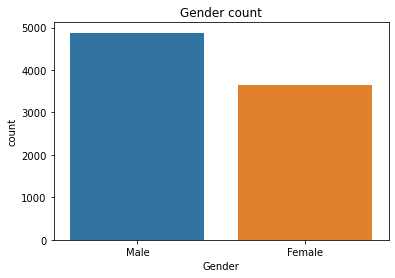

In [21]:
# Explore distribution of gender
plt.figure()
ax = sns.countplot(x = "Gender", data = df)
plt.title("Gender count")

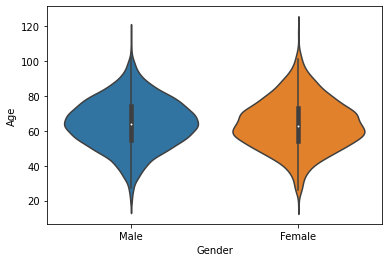

In [22]:
# Create a violin plot
sns.violinplot(data=df, x='Gender', y='Age')
plt.show()

Similar age distribution with female having a slightly older age range

Text(0.5, 1.0, 'COPD History')

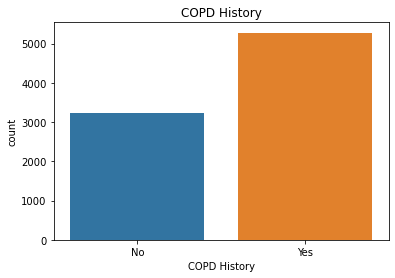

In [23]:
# Explore distribution of gender
plt.figure()
ax = sns.countplot(x = "COPD History", data = df)
plt.title("COPD History")

In [24]:
# prepare for grouped bar chart
# Count lung cancer outcome based on COPD History
COPD_yy = ((df['COPD History'] == 'Yes') & (df['Lung Cancer Occurrence'] == 1)).sum()
COPD_yn = ((df['COPD History'] == 'Yes') & (df['Lung Cancer Occurrence'] == 0)).sum()
COPD_ny = ((df['COPD History'] == 'No') & (df['Lung Cancer Occurrence'] == 1)).sum()
COPD_nn = ((df['COPD History'] == 'No') & (df['Lung Cancer Occurrence'] == 0)).sum()

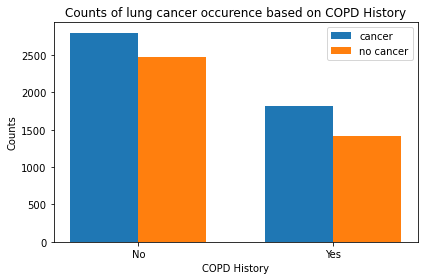

In [25]:
# Create grouped bar chart

# Group cancer occurence
characteristics = ['No', 'Yes']
yes_counts = [COPD_yy, COPD_ny]  # Counts of outcome 1 for each characteristic
no_counts = [COPD_yn, COPD_nn]   # Counts of outcome 0 for each characteristic

# Define the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(characteristics))

# Create the grouped bar chart
plt.bar(x - bar_width/2, yes_counts, width=bar_width, label='cancer')
plt.bar(x + bar_width/2, no_counts, width=bar_width, label='no cancer')

# Add labels, title, and legend
plt.xlabel('COPD History')
plt.ylabel('Counts')
plt.title('Counts of lung cancer occurence based on COPD History')
plt.xticks(x, characteristics)
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The number of cancer patients is in proportion with the sample size in each COPD History class

Text(0.5, 1.0, 'Genetic Markers')

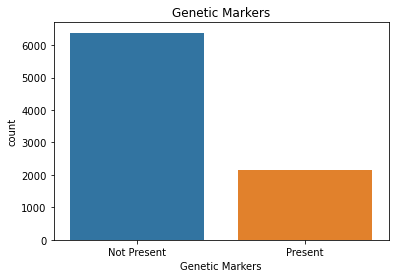

In [26]:
# Explore distribution of gender
plt.figure()
ax = sns.countplot(x = "Genetic Markers", data = df)
plt.title("Genetic Markers")

Text(0.5, 1.0, 'Air Pollution Exposure')

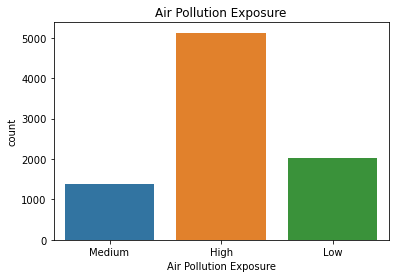

In [27]:
# Explore distribution of gender
plt.figure()
ax = sns.countplot(x = "Air Pollution Exposure", data = df)
plt.title("Air Pollution Exposure")

Noticing that the variance in weight difference between "Last Weight" and "Current Weight" is pretty constant, and the effective dates of these two weights are not known, the average weight will be used

In [28]:
df['Avg Weight']= (df['Last Weight'] + df['Current Weight'])/2

C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/3125051820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg Weight']= (df['Last Weight'] + df['Current Weight'])/2


In [29]:
df

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Avg Weight
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1,71.0
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,46.0
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0,70.0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1,63.5
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,7.785505e+17,71,Male,Yes,Not Present,High,100,93,1958,2015,Yes,High,Right,0,96.5
10343,6.202150e+17,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0,52.5
10344,1.157407e+18,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0,80.5
10345,1.488014e+18,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1,61.0


In [30]:
sorted(df['Start Smoking'].unique())

['1923',
 '1927',
 '1928',
 '1929',
 '1930',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 'Not Applicable']

Convert the "Start Smoking" into number of years where 2024 (current year) is initialised as 1 and "Not Applicable" as 0. The preceding years are added 1 accordingly

In [31]:
sorted(df['Stop Smoking'].unique())

['1933',
 '1939',
 '1940',
 '1941',
 '1944',
 '1946',
 '1948',
 '1949',
 '1950',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 'Not Applicable',
 'Still Smoking']

Convert the "Stop Smoking" into number of years where "Still Smoking" is set as 2024 (current year) and initialised as 1 and "Not Applicable" as 0. The preceding years are added 1 accordingly

In [32]:
# Check to make sense that those who start smoking in 2024 are still smoking
df[df['Start Smoking']=='2024']

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Avg Weight
220,1.086728e+17,56,Male,Yes,Present,Medium,63,54,2024,Still Smoking,Yes,None / Low,Right,1,58.5
247,6.988761e+17,62,Male,No,Present,High,80,78,2024,Still Smoking,No,Medium,Right,1,79.0
268,2.024217e+18,80,Male,Yes,Not Present,High,98,98,2024,Still Smoking,Yes,Medium,Left,1,98.0
305,7.585453e+16,40,Male,Yes,Not Present,High,92,84,2024,Still Smoking,Yes,None / Low,Right,1,88.0
1060,1.721763e+18,72,Male,No,Not Present,High,96,77,2024,Still Smoking,No,High,RightBoth,1,86.5
1139,3.375687e+17,80,Male,No,Not Present,High,71,58,2024,Still Smoking,No,High,RightBoth,1,64.5
1312,5.193454e+17,43,Male,No,Not Present,Low,52,57,2024,Still Smoking,No,High,Right,0,54.5
1465,2.558533e+17,51,Male,No,Not Present,High,99,85,2024,Still Smoking,No,Medium,Right,1,92.0
1585,1.911217e+18,50,Male,Yes,Present,High,71,75,2024,Still Smoking,Yes,High,Right,1,73.0
1938,3.939461e+17,35,Male,Yes,Not Present,Low,83,90,2024,Still Smoking,Yes,None / Low,Right,0,86.5


In [33]:
# convert "Not Applicable" to 0
# convert "Start Smoking" years to int to calculate number of years
df['Start Smoking'] = df['Start Smoking'].replace("Not Applicable", 0)
df['Start Smoking'] = df['Start Smoking'].astype(int)

C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/4093949492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Smoking'] = df['Start Smoking'].replace("Not Applicable", 0)
C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/4093949492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Smoking'] = df['Start Smoking'].astype(int)


In [34]:
# replace "Not Applicable" to 0; "Still smoking" to current year
# convert "Stop Smoking" years to int to calculate number of years
import datetime

df['Stop Smoking'] = df['Stop Smoking'].replace("Not Applicable", 0)
df['Stop Smoking'] = df['Stop Smoking'].replace("Still Smoking", datetime.datetime.now().year)
df['Stop Smoking'] = df['Stop Smoking'].astype(int)

C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/2132516064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stop Smoking'] = df['Stop Smoking'].replace("Not Applicable", 0)
C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/2132516064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stop Smoking'] = df['Stop Smoking'].replace("Still Smoking", datetime.datetime.now().year)
C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/2132516064.py:7: SettingWithCopyWarning: 
A value is trying to be set on

In [35]:
# Year 2024 set as 1 and step 1 with each preceding year
# "Not Applicable" will be set as 0

# Get the current year
current_year = datetime.datetime.now().year

df['Smoke_Years'] = df['Start Smoking'].apply(lambda x: (current_year - x + 1) if x!=0 else 0)
df['Stop_Years'] = df['Stop Smoking'].apply(lambda x: (current_year - x + 1) if x!=0 else 0)


C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/4224362767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoke_Years'] = df['Start Smoking'].apply(lambda x: (current_year - x + 1) if x!=0 else 0)
C:\Users\ashre\AppData\Local\Temp/ipykernel_16236/4224362767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stop_Years'] = df['Stop Smoking'].apply(lambda x: (current_year - x + 1) if x!=0 else 0)


In [36]:
df.head(20)

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Avg Weight,Smoke_Years,Stop_Years
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1,71.0,10,5
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,46.0,19,13
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,2024,Yes,None / Low,Right,0,70.0,27,1
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1,63.5,14,11
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0,43.0,31,8
5,1.175068e+18,49,Male,Yes,Present,Low,67,60,2001,2024,Yes,Medium,Right,0,63.5,24,1
6,1.610044e+18,57,Male,Yes,Present,Medium,67,58,1982,2020,Yes,None / Low,Right,0,62.5,43,5
7,6.987460e+17,50,Male,No,Not Present,High,91,95,1996,2024,No,Medium,Right,1,93.0,29,1
9,1.468042e+18,68,Male,Yes,Not Present,Low,45,46,2020,2022,Yes,Medium,Right,0,45.5,5,3
10,3.679877e+17,48,Male,Yes,Present,Low,65,60,2008,2009,Yes,None / Low,Left,0,62.5,17,16


Text(0.5, 1.0, 'Taken Bronchodilators Distribution')

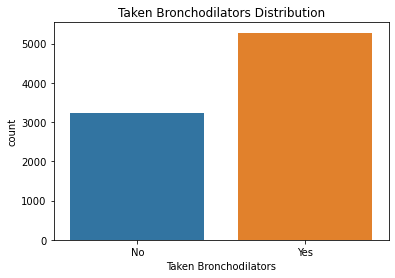

In [37]:
# Explore distribution of age
plt.figure()
ax = sns.countplot(x = "Taken Bronchodilators", data = df)
plt.title("Taken Bronchodilators Distribution")

Text(0.5, 1.0, 'Frequency of Tiredness')

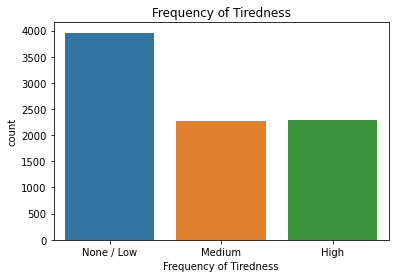

In [38]:
# Explore distribution of age
plt.figure()
ax = sns.countplot(x = "Frequency of Tiredness", data = df)
plt.title("Frequency of Tiredness")

Text(0.5, 1.0, 'Dominant Hand Distribution')

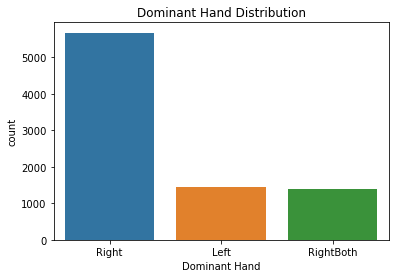

In [39]:
# Explore distribution of age
plt.figure()
ax = sns.countplot(x = "Dominant Hand", data = df)
plt.title("Dominant Hand Distribution")

In [40]:
# prepare for grouped bar chart

# Count lung cancer outcome of dominant hand values
Right_yes = ((df['Dominant Hand'] == 'Right') & (df['Lung Cancer Occurrence'] == 1)).sum()
Right_no = ((df['Dominant Hand'] == 'Right') & (df['Lung Cancer Occurrence'] == 0)).sum()
Left_yes = ((df['Dominant Hand'] == 'Left') & (df['Lung Cancer Occurrence'] == 1)).sum()
Left_no = ((df['Dominant Hand'] == 'Left') & (df['Lung Cancer Occurrence'] == 0)).sum()
RightBoth_yes = ((df['Dominant Hand'] == 'RightBoth') & (df['Lung Cancer Occurrence'] == 1)).sum()
RightBoth_no = ((df['Dominant Hand'] == 'RightBoth') & (df['Lung Cancer Occurrence'] == 0)).sum()

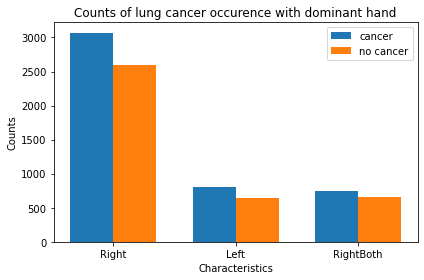

In [41]:
# Create grouped bar chart

# Group cancer occurence
characteristics = ['Right', 'Left', 'RightBoth']
yes_counts = [Right_yes, Left_yes, RightBoth_yes]  # Counts of outcome 1 for each characteristic
no_counts = [Right_no, Left_no, RightBoth_no]   # Counts of outcome 0 for each characteristic

# Define the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(characteristics))

# Create the grouped bar chart
plt.bar(x - bar_width/2, yes_counts, width=bar_width, label='cancer')
plt.bar(x + bar_width/2, no_counts, width=bar_width, label='no cancer')

# Add labels, title, and legend
plt.xlabel('Characteristics')
plt.ylabel('Counts')
plt.title('Counts of lung cancer occurence with dominant hand')
plt.xticks(x, characteristics)
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

No peculiar relationship between occurence of cancer and dominant hand; the proportion of having cancer and no cancer in each characteristic is similar. Furthermore, majority of the patients have Right as dominant hand. Will drop this attribute.
If time permits, will add this feature in to see if the model performs better.

Text(0.5, 1.0, 'Lung Cancer Occurrence')

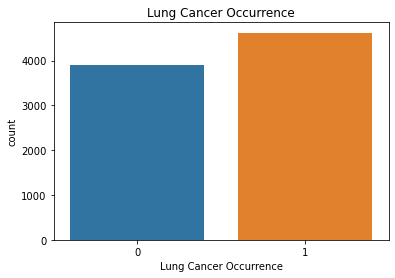

In [42]:
# Explore distribution of lung cancer occurence
plt.figure()
ax = sns.countplot(x = "Lung Cancer Occurrence", data = df)
plt.title("Lung Cancer Occurrence")

Lung Cancer Occurence is not strongly imbalanced, will accept this distribution in the modeling without the need to resample

Perform one-hot encoding on Gender, COPD History, Genetic Markers, Air Pollution Exposure, Taken Bronchodilators and Frequency of Tiredness to do the correlation matrix

In [43]:
X = pd.get_dummies(df, columns = ['Gender', 'COPD History','Genetic Markers','Air Pollution Exposure','Taken Bronchodilators',
                                  'Frequency of Tiredness'])

In [44]:
X

,ID,Age,Last Weight,Current Weight,Start Smoking,Stop Smoking,Dominant Hand,Lung Cancer Occurrence,Avg Weight,Smoke_Years,...,Genetic Markers_Not Present,Genetic Markers_Present,Air Pollution Exposure_High,Air Pollution Exposure_Low,Air Pollution Exposure_Medium,Taken Bronchodilators_No,Taken Bronchodilators_Yes,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low
0,1.468154e+16,42,73,69,2015,2020,Right,1,71.0,10,...,1,0,0,0,1,1,0,0,0,1
1,1.271684e+18,72,50,42,2006,2012,Right,1,46.0,19,...,1,0,1,0,0,0,1,0,1,0
2,1.708068e+18,65,65,75,1998,2024,Right,0,70.0,27,...,1,0,0,1,0,0,1,0,0,1
3,3.555829e+17,67,69,58,2011,2014,Right,1,63.5,14,...,1,0,1,0,0,1,0,0,0,1
4,1.684598e+18,54,46,40,1994,2017,Right,0,43.0,31,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,7.785505e+17,71,100,93,1958,2015,Right,0,96.5,67,...,1,0,1,0,0,0,1,1,0,0
10343,6.202150e+17,47,55,50,2009,2024,Right,0,52.5,16,...,0,1,0,1,0,0,1,0,1,0
10344,1.157407e+18,59,80,81,2008,2011,RightBoth,0,80.5,17,...,1,0,0,1,0,0,1,0,1,0
10345,1.488014e+18,34,65,57,2020,2024,RightBoth,1,61.0,5,...,1,0,1,0,0,1,0,0,1,0


In [45]:
X.columns

Index(['ID', 'Age', 'Last Weight', 'Current Weight', 'Start Smoking',
       'Stop Smoking', 'Dominant Hand', 'Lung Cancer Occurrence', 'Avg Weight',
       'Smoke_Years', 'Stop_Years', 'Gender_Female', 'Gender_Male',
       'COPD History_No', 'COPD History_Yes', 'Genetic Markers_Not Present',
       'Genetic Markers_Present', 'Air Pollution Exposure_High',
       'Air Pollution Exposure_Low', 'Air Pollution Exposure_Medium',
       'Taken Bronchodilators_No', 'Taken Bronchodilators_Yes',
       'Frequency of Tiredness_High', 'Frequency of Tiredness_Medium',
       'Frequency of Tiredness_None / Low'],
      dtype='object')

Drop "Last Weight" and "Current Weight" by using "Avg Weight". 
"Start Smoking" and "Stop Smoking" years are dropped, replaced by the calculated attributes "Smoke_Years" and "Stop_Years".
According to research, Dominant Hand does not have any scientific proof that it is related to cancer, so it is dropped.
The least frequency of the one-hot encoding features are dropped.

In [46]:
# Drop irrelevat attributes and least frequency atrribute from one-hot encoding

X = X.drop(["ID", "Last Weight","Current Weight", "Start Smoking", "Stop Smoking", "Dominant Hand", "Gender_Female", 
            "COPD History_No", "Genetic Markers_Present", "Air Pollution Exposure_Medium","Taken Bronchodilators_No",
           "Frequency of Tiredness_High"], axis=1)

In [47]:
# shift column 'Lung Cancer Occurrence' to first position to create the correlation matrix
f_col = X.pop('Lung Cancer Occurrence') 
  
# insert column using insert(position,column_name, first_column) function 
X.insert(0, 'Lung Cancer Occurrence', f_col) 

In [48]:
X

,Lung Cancer Occurrence,Age,Avg Weight,Smoke_Years,Stop_Years,Gender_Male,COPD History_Yes,Genetic Markers_Not Present,Air Pollution Exposure_High,Air Pollution Exposure_Low,Taken Bronchodilators_Yes,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low
0,1,42,71.0,10,5,1,0,1,0,0,0,0,1
1,1,72,46.0,19,13,1,1,1,1,0,1,1,0
2,0,65,70.0,27,1,1,1,1,0,1,1,0,1
3,1,67,63.5,14,11,1,0,1,1,0,0,0,1
4,0,54,43.0,31,8,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,0,71,96.5,67,10,1,1,1,1,0,1,0,0
10343,0,47,52.5,16,1,1,1,0,0,1,1,1,0
10344,0,59,80.5,17,14,0,1,1,0,1,1,1,0
10345,1,34,61.0,5,1,1,0,1,1,0,0,1,0


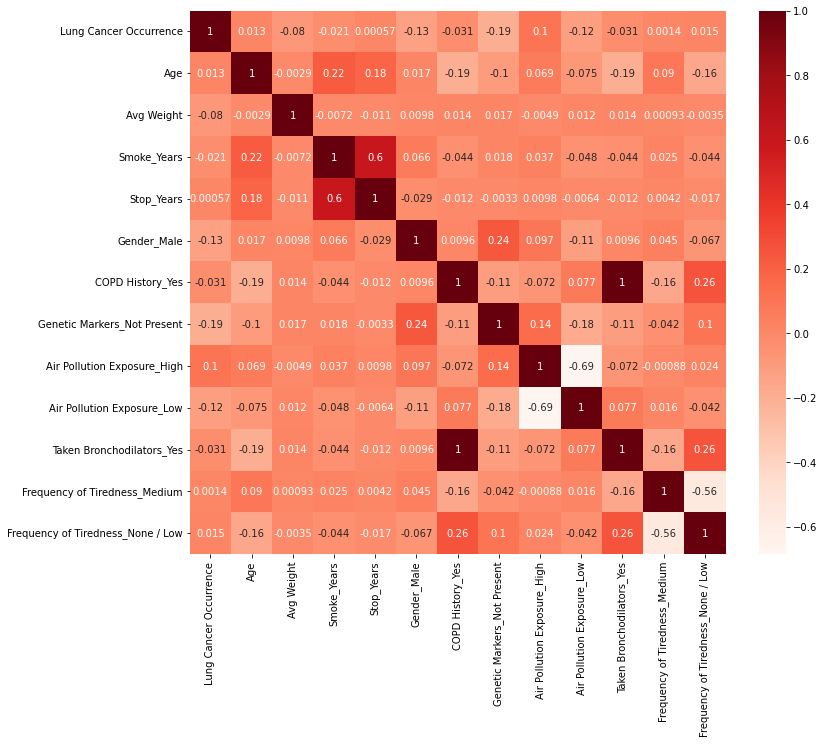

In [49]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Although there is a moderate collinearity between Smoke_Years and Stop_Years, both attributes are relevant to the outcome, hence both will be included in the modeling